In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('training_scores_per_episode.csv', index_col = 0)

# Continuous Control Report

---

The aim of the project is to train a double-jointed arm to move its hand to the goal location and keep it there.  

To solve this task we used a type of actor-critic model called DDPG (deep deterministic policy gradient) where the actor is a policy based model that learns in a continuous action space and the critic learns a value function such as the DQN and provides information on the performance to the actor.  

Following a very interesting [blogpost](https://medium.com/@kinwo/solving-continuous-control-environment-using-deep-deterministic-policy-gradient-ddpg-agent-5e94f82f366d) that explains solving the continuous control problem with DDPG we implemented several of the recommended improvements such as gradient clipping, batch normalization, etc. 

The actor network has the following architecture, an input layer corresponding to the state size, a fully connected layer with 400 units with batch normalization and a relu activation function, then a fully connected layer with 300 neurons and relu activation and finally, the output layer corresponding to the action size. The critic network architecture is the following, an input layer corresponding to the state space size, then a fully connected layer of 400 units with batch normalization and relu activation, this layer is concatenated with units corresponding to the action space size, then another hidden layer fully connected with 300 units and relu activation and finally an output of one unit corresponding to the Q-value.

The model hyperparameters are the following:

BUFFER_SIZE = int(1e6)  
BATCH_SIZE = 1024       
GAMMA = 0.99            
TAU = 1e-3              
LR_ACTOR = 1e-3         
LR_CRITIC = 1e-3        
WEIGHT_DECAY = 0.0000  

The model takes approximately 100 episodes to solve the environment with a minimum reward of 30. Plot below shows the reward per number of episodes used in training, we can see that with the selected model parameters and architecture, the reward oscillates around 36 after the 25th episode.


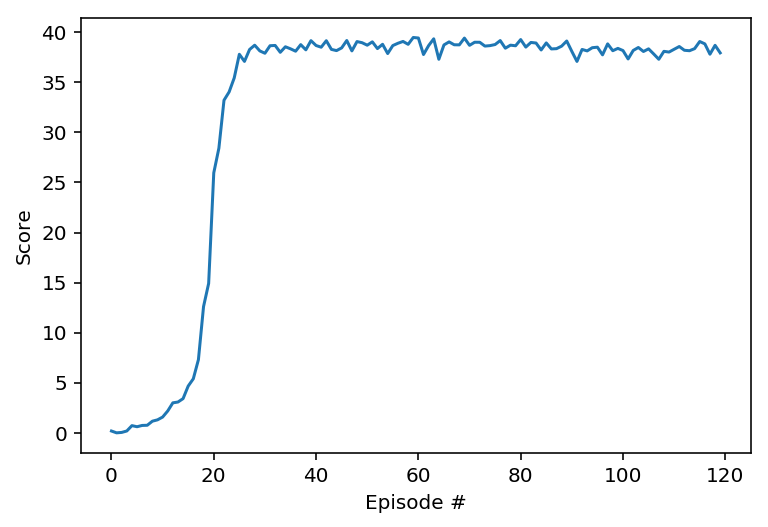

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(df)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

To improve the score, other algorithms could be tried, for example PPO, A3C, D4PG.